In [1]:

from matplotlib import pyplot as plt
import networkx as nx

In [2]:
def Graph():

 #nodes postions resembling Nairobis Map
    G.add_node('SportsComplex',pos=(1,5))
    G.add_node('Siwaka',pos=(5,5))
    G.add_node('Ph.1A',pos=(8,5))
    G.add_node('Ph.1B',pos=(8,4))
    G.add_node('STC',pos=(8,3))
    G.add_node('Phase2',pos=(12,4))
    G.add_node('J1',pos=(15,4))
    G.add_node('Mada',pos=(18,4))
    G.add_node('Phase3',pos=(15,3))
    G.add_node('ParkingLot',pos=(17,2))

    G.add_edge('SportsComplex','Siwaka',weight=450 )
    G.add_edge('Siwaka','Ph.1A',weight=10)
    G.add_edge('Siwaka','Ph.1B',weight=230)
    G.add_edge('Ph.1A','Ph.1B',weight=100)
    G.add_edge('Ph.1A','Mada',weight=850)
    G.add_edge('Ph.1B','Phase2',weight=112)
    G.add_edge('Ph.1B','STC',weight=50)
    G.add_edge('Phase2','J1',weight=600)
    G.add_edge('Phase2','STC',weight=50)
    G.add_edge('Phase2','Phase3',weight=500)
    G.add_edge('J1','Mada',weight=200)
    G.add_edge('STC','ParkingLot',weight=250)
    G.add_edge('Phase3','ParkingLot',weight=350)
    G.add_edge('Mada','ParkingLot',weight=700)

In [3]:
def path_cost(path):
    total_cost = 0
    for(node , cost) in path:
        total_cost += cost
    return total_cost, path[-1][0]

def ucs(start_node , goal_node):
    visted = {}
    frontier = [[(start_node, 0)]]
    
    for node in G.nodes:
        visted[node] = False
    while frontier:
        frontier.sort(key=path_cost)
        ucs_result = frontier.pop(0)
        curr_node = ucs_result[-1][0]
        if visted[curr_node]:
            continue
        
        visted[curr_node] = True

        if curr_node == goal_node:
            return ucs_result
        else:
            for node in G.neighbors(curr_node):
                new_path = ucs_result.copy()
                new_path.append((node, G[curr_node][node]['weight']))
                frontier.append(new_path)
    return False 

In [6]:
def draw_ucs():
    ucs_path = ucs('SportsComplex', 'ParkingLot')
     
    if ucs_path == False:
        print('Path Not Found!')
        return 0
    
    ucs_path_fin = []
    for i in range(len(ucs_path)):
        ucs_path_fin.append(ucs_path[i][0])

    print('UCS Traversal Path: ', '->'.join(ucs_path_fin))
    color_map = []
    
    for node in G.nodes:
        if node in ucs_path_fin:
            color_map.append('purple')
        else:
            color_map.append('brown')
    
    # Draw the Graph
    pos = nx.get_node_attributes(G, 'pos')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, verticalalignment='bottom')
    nx.draw(G, pos, node_size=1500, node_color=color_map, with_labels=True)
    plt.title('UNIFORM COST SEARCH')
    plt.show() 

UCS Traversal Path:  SportsComplex->Siwaka->Ph.1A->Ph.1B->STC->ParkingLot


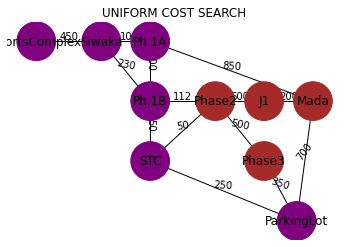

In [7]:
G = nx.Graph()
Graph()
draw_ucs()